In [44]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import autokeras as ak

In [45]:
from sklearn import tree

In [46]:
df = pd.read_excel('./농넷_영주시_일별사과.xlsx')

In [47]:
from pycaret.classification import *

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(df['등급명'])
df['등급명'] = encoder.transform(df['등급명'])
df

,DATE,거래단위,평균가격(원),총거래물량(kg),총거래금액(원),시장명,법인명,품목명,품종명,산지명,산지시군명,등급명
0,2024-03-13,10.0,62366.666667,1800.0,11226000,서울가락도매,동화청과,사과,미시마,경상북도,영주시,3
1,2024-03-13,10.0,95000.000000,3840.0,36480000,서울가락도매,서울청과,사과,후지,경상북도,영주시,3
2,2024-03-13,10.0,60900.000000,1200.0,7308000,수원도매시장,경기청과,사과,미얀마,경북,영주시,3
3,2024-03-13,10.0,61300.000000,600.0,3678000,인천삼산도매,경인농산,사과,미시마,경상북도,영주시,3
4,2024-03-13,20.0,152875.568182,3520.0,26906100,안동도매시장,안동청과,사과,미얀마,경북,영주시,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65184,2020-01-03,10.0,24833.333333,2400.0,5960000,서울가락도매,농협가락(공),사과,미안마,경북,영주시,3
65185,2020-01-03,10.0,20000.000000,300.0,600000,서울가락도매,농협가락(공),사과,후지,경북,영주시,3
65186,2020-01-03,18.0,25200.000000,2700.0,3780000,구리도매시장,농협구리(공),사과,기타사과,경북,영주시,3
65187,2020-01-03,18.0,25200.000000,1620.0,2268000,구리도매시장,농협구리(공),사과,기타사과,경북,영주시,3


In [49]:
df_temp = df[['등급명',  '거래단위']]
df_temp

,등급명,거래단위
0,3,10.0
1,3,10.0
2,3,10.0
3,3,10.0
4,0,20.0
...,...,...
65184,3,10.0
65185,3,10.0
65186,3,18.0
65187,3,18.0


In [50]:
df_temp.isnull().sum()

등급명     0
거래단위    0
dtype: int64

In [51]:
import numpy as np
# scikit-learn에서 R의 MICE 패키지를 따라서 실험적으로 개발 중
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [52]:
df_temp.isnull().sum()

등급명     0
거래단위    0
dtype: int64

In [53]:
#pycaret
s = setup(df_temp, target = '등급명')

,Description,Value
0,Session id,2045
1,Target,등급명
2,Target type,Multiclass
3,Original data shape,"(65189, 2)"
4,Transformed data shape,"(65189, 2)"
5,Transformed train set shape,"(45632, 2)"
6,Transformed test set shape,"(19557, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [54]:

from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(df_temp, target = '등급명')

,Description,Value
0,Session id,6095
1,Target,등급명
2,Target type,Multiclass
3,Original data shape,"(65189, 2)"
4,Transformed data shape,"(65189, 2)"
5,Transformed train set shape,"(45632, 2)"
6,Transformed test set shape,"(19557, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [55]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6634,0.7772,0.6634,0.6082,0.5766,0.4798,0.5197,0.4050
xgboost,Extreme Gradient Boosting,0.6634,0.7772,0.6634,0.6082,0.5766,0.4797,0.5197,0.1370
lightgbm,Light Gradient Boosting Machine,0.6634,0.7772,0.6634,0.6082,0.5766,0.4797,0.5197,0.2260
dt,Decision Tree Classifier,0.6633,0.7772,0.6633,0.6077,0.5765,0.4796,0.5195,0.0100
rf,Random Forest Classifier,0.6633,0.7772,0.6633,0.6080,0.5765,0.4796,0.5196,0.0920
et,Extra Trees Classifier,0.6633,0.7772,0.6633,0.6078,0.5765,0.4796,0.5196,0.0730
svm,SVM - Linear Kernel,0.6580,0.0000,0.6580,0.4946,0.5547,0.4685,0.5125,0.1800
ada,Ada Boost Classifier,0.6575,0.7691,0.6575,0.4816,0.5522,0.4674,0.5120,0.0920
lr,Logistic Regression,0.6561,0.7758,0.6561,0.4811,0.5511,0.4652,0.5100,0.0500
nb,Naive Bayes,0.6561,0.7706,0.6561,0.4811,0.5511,0.4652,0.5100,0.0080


In [56]:
print(best)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=6095, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [57]:

# functional API
evaluate_model(best)

# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

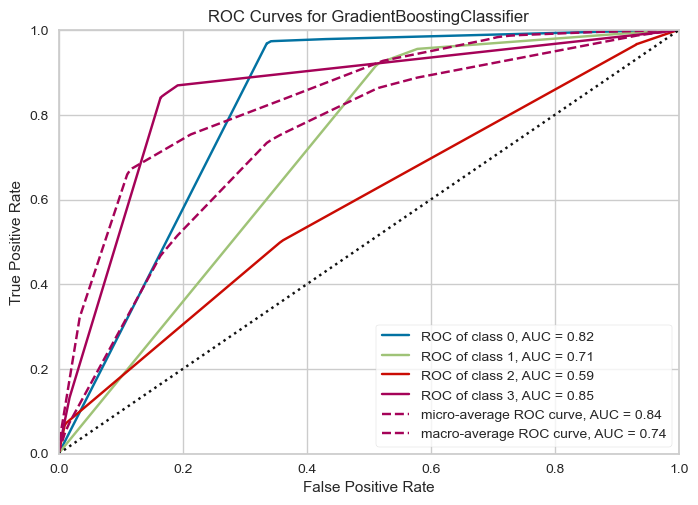

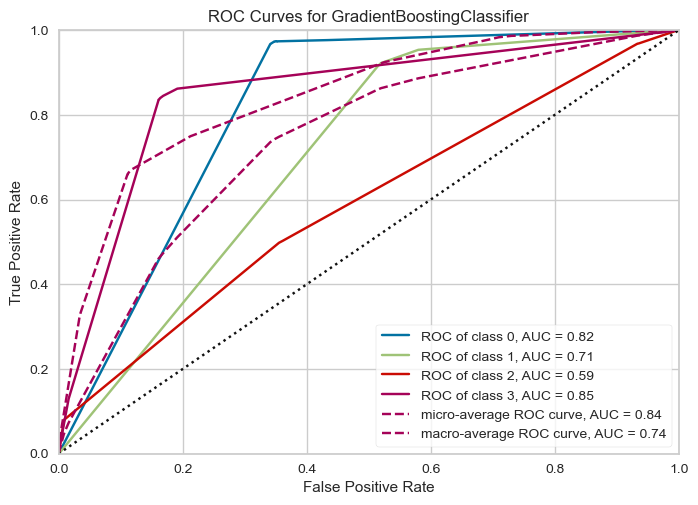

In [58]:
# functional API
plot_model(best, plot = 'auc')

# OOP API
s.plot_model(best, plot = 'auc')

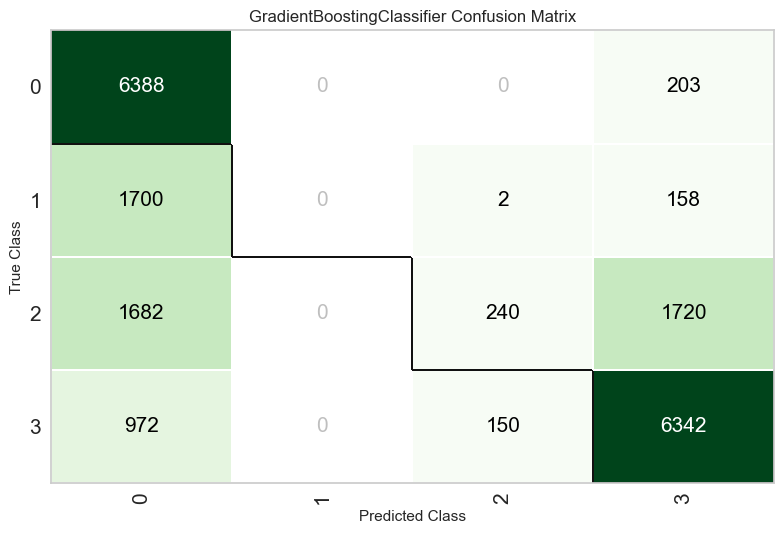

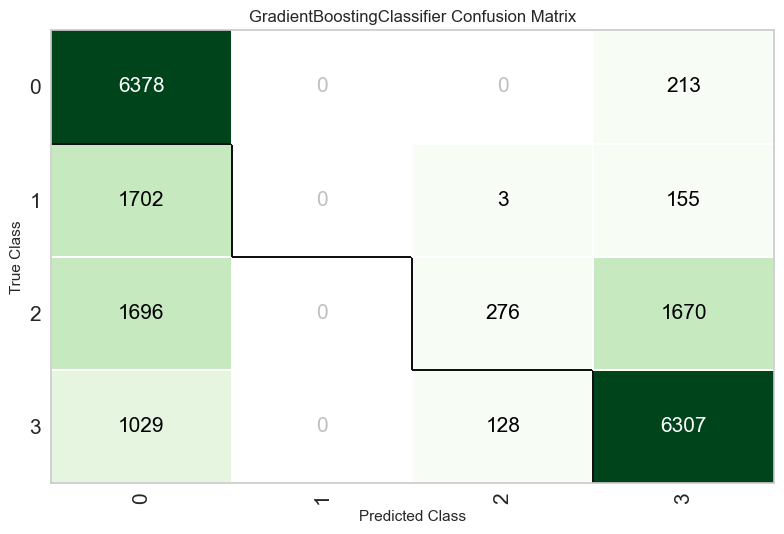

In [59]:
# functional API
plot_model(best, plot = 'confusion_matrix')

# OOP API
s.plot_model(best, plot = 'confusion_matrix')

In [60]:
# functional API
predict_model(best)

# OOP API
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6632,0.7780,0.6632,0.6018,0.5753,0.4793,0.5187


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6627,0.7760,0.6627,0.6137,0.5770,0.4788,0.5185


,거래단위,등급명,prediction_label,prediction_score
11857,20.0,0,0,0.5907
37193,10.0,3,3,0.7516
64396,20.0,0,0,0.5907
50849,20.0,1,0,0.5907
51111,20.0,1,0,0.5907
...,...,...,...,...
33850,20.0,1,0,0.5907
24707,10.0,3,3,0.7516
22503,20.0,1,0,0.5907
54081,10.0,2,3,0.7516


In [61]:

# functional API
predictions = predict_model(best, data=df_temp)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=df_temp)
predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6633,0.7772,0.6633,0.6097,0.5768,0.4795,0.5194


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6633,0.7772,0.6633,0.6097,0.5768,0.4795,0.5194


,거래단위,등급명,prediction_label,prediction_score
0,10.0,3,3,0.7516
1,10.0,3,3,0.7516
2,10.0,3,3,0.7516
3,10.0,3,3,0.7516
4,20.0,0,0,0.5907


In [62]:
# functional API
predictions = predict_model(best, data=df_temp, raw_score=True)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=df_temp, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6633,0.7772,0.6633,0.6097,0.5768,0.4795,0.5194


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6633,0.7772,0.6633,0.6097,0.5768,0.4795,0.5194


,거래단위,등급명,prediction_label,prediction_score_0,prediction_score_1,prediction_score_2,prediction_score_3
0,10.0,3,3,0.0201,0.0114,0.2169,0.7516
1,10.0,3,3,0.0201,0.0114,0.2169,0.7516
2,10.0,3,3,0.0201,0.0114,0.2169,0.7516
3,10.0,3,3,0.0201,0.0114,0.2169,0.7516
4,20.0,0,0,0.5907,0.1572,0.1601,0.0921


In [63]:
# functional API
save_model(best, 'my_best_apple')

# OOP API
s.save_model(best, 'my_best_apple')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['거래단위'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                 

In [64]:
# functional API
loaded_model = load_model('my_best_apple')
print(loaded_model)

# OOP API
loaded_model = s.load_model('my_best_apple')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\jhi08\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['거래단위'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, incl...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
              

In [65]:
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(df_temp, target = '등급명')

,Description,Value
0,Session id,3126
1,Target,등급명
2,Target type,Regression
3,Original data shape,"(65189, 2)"
4,Transformed data shape,"(65189, 2)"
5,Transformed train set shape,"(45632, 2)"
6,Transformed test set shape,"(19557, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [66]:
# pycaret regression
from pycaret.regression import *
s = setup(df_temp, target = '등급명')

,Description,Value
0,Session id,4655
1,Target,등급명
2,Target type,Regression
3,Original data shape,"(65189, 2)"
4,Transformed data shape,"(65189, 2)"
5,Transformed train set shape,"(45632, 2)"
6,Transformed test set shape,"(19557, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [67]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6949,0.7510,0.8665,0.5523,0.4357,0.2915,0.0570
et,Extra Trees Regressor,0.6948,0.7512,0.8666,0.5522,0.4357,0.2914,0.0360
rf,Random Forest Regressor,0.6947,0.7512,0.8666,0.5522,0.4356,0.2916,0.0530
gbr,Gradient Boosting Regressor,0.6950,0.7512,0.8666,0.5522,0.4358,0.2915,0.0540
xgboost,Extreme Gradient Boosting,0.6948,0.7513,0.8667,0.5521,0.4358,0.2914,0.0170
dt,Decision Tree Regressor,0.6948,0.7513,0.8667,0.5521,0.4358,0.2914,0.0090
ada,AdaBoost Regressor,0.7430,0.7777,0.8818,0.5364,0.4609,0.2608,0.0180
br,Bayesian Ridge,0.7519,0.8051,0.8972,0.5200,0.4467,0.3039,0.0110
omp,Orthogonal Matching Pursuit,0.7519,0.8051,0.8972,0.5200,0.4467,0.3039,0.0090
lar,Least Angle Regression,0.7519,0.8051,0.8972,0.5200,0.4467,0.3039,0.0090


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6949,0.7510,0.8665,0.5523,0.4357,0.2915,0.0570
et,Extra Trees Regressor,0.6948,0.7512,0.8666,0.5522,0.4357,0.2914,0.0340
rf,Random Forest Regressor,0.6947,0.7512,0.8666,0.5522,0.4356,0.2916,0.0470
gbr,Gradient Boosting Regressor,0.6950,0.7512,0.8666,0.5522,0.4358,0.2915,0.0580
xgboost,Extreme Gradient Boosting,0.6948,0.7513,0.8667,0.5521,0.4358,0.2914,0.0180
dt,Decision Tree Regressor,0.6948,0.7513,0.8667,0.5521,0.4358,0.2914,0.0090
ada,AdaBoost Regressor,0.7430,0.7777,0.8818,0.5364,0.4609,0.2608,0.0180
br,Bayesian Ridge,0.7519,0.8051,0.8972,0.5200,0.4467,0.3039,0.0090
omp,Orthogonal Matching Pursuit,0.7519,0.8051,0.8972,0.5200,0.4467,0.3039,0.0090
lar,Least Angle Regression,0.7519,0.8051,0.8972,0.5200,0.4467,0.3039,0.0080


In [68]:
print(best)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=4655, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)


In [69]:
# functional API
evaluate_model(best)

# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

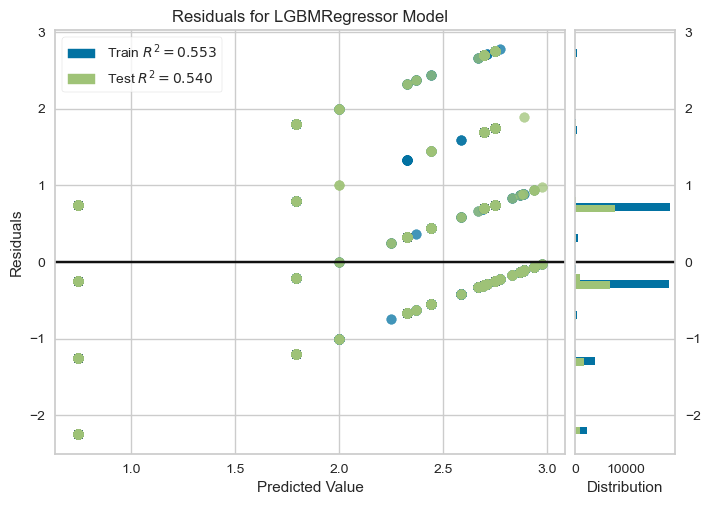

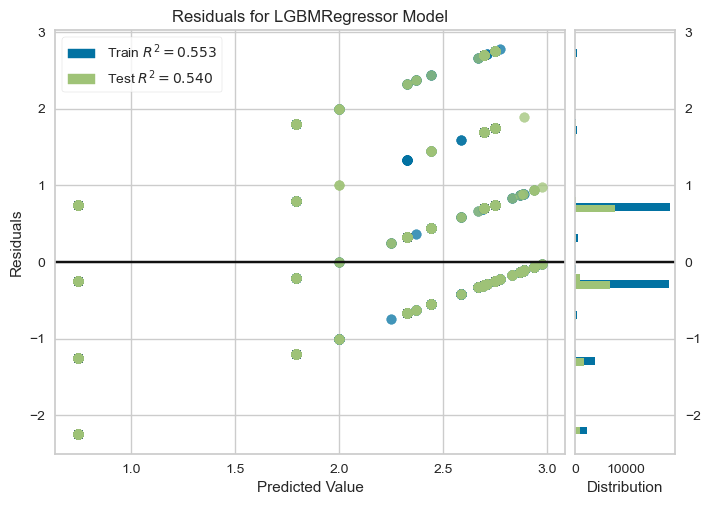

In [70]:
# functional API
plot_model(best)

# OOP API
s.plot_model(best)


In [71]:

# functional API
predict_model(best)

# OOP API
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.7017,0.7674,0.8760,0.5397,0.4376,0.2970


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.7017,0.7674,0.8760,0.5397,0.4376,0.2970


,거래단위,등급명,prediction_label
58150,20.0,0,0.746980
18710,10.0,2,2.699202
43573,10.0,2,2.699202
38706,10.0,3,2.699202
5631,20.0,2,0.746980
...,...,...,...
64921,10.0,3,2.699202
8522,20.0,0,0.746980
40697,20.0,0,0.746980
64820,5.0,3,2.747964


In [72]:
# functional API
predictions = predict_model(best, data=df_temp)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=df_temp)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.6968,0.7555,0.8692,0.5489,0.4362,0.2931


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.6968,0.7555,0.8692,0.5489,0.4362,0.2931


,거래단위,등급명,prediction_label
0,10.0,3,2.699202
1,10.0,3,2.699202
2,10.0,3,2.699202
3,10.0,3,2.699202
4,20.0,0,0.746980
